In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d, generate_1d, geometry_util

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device {}".format(device))

using device cuda


In [3]:
encoder_2d, decoder_2d, _ = generate_1d.train(0, 1, 2, device, n_training_iterations=7000)

/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.8036292791366577, distance cost: 0.07744021713733673
iteration: 7, decoding loss: 0.9515012502670288, distance cost: 0.11328479647636414
iteration: 135, decoding loss: 0.797117292881012, distance cost: 0.2655136287212372
iteration: 144, decoding loss: 0.7384085059165955, distance cost: 0.2790839374065399
iteration: 146, decoding loss: 0.7255424857139587, distance cost: 0.2599364221096039
iteration: 173, decoding loss: 0.7377685904502869, distance cost: 0.24579167366027832
iteration: 175, decoding loss: 0.7179972529411316, distance cost: 0.24557048082351685
iteration: 217, decoding loss: 0.771249532699585, distance cost: 0.18481257557868958
iteration: 231, decoding loss: 0.7593860030174255, distance cost: 0.1937485635280609
iteration: 243, decoding loss: 0.7666867971420288, distance cost: 0.18157079815864563
iteration: 246, decoding loss: 0.7388070821762085, distance cost: 0.18206441402435303
iteration: 264, decoding loss: 0.7220255136489868, distance cost

In [4]:
phases = np.arange(start=-np.pi, stop=np.pi, step=0.01)
phases_torch = torch.tensor(np.expand_dims(phases, -1), dtype=torch.get_default_dtype()).to(device)
with torch.no_grad():
    test_embedding_2d = encoder_2d(phases_torch)
test_embedding_2d = test_embedding_2d.cpu().numpy()

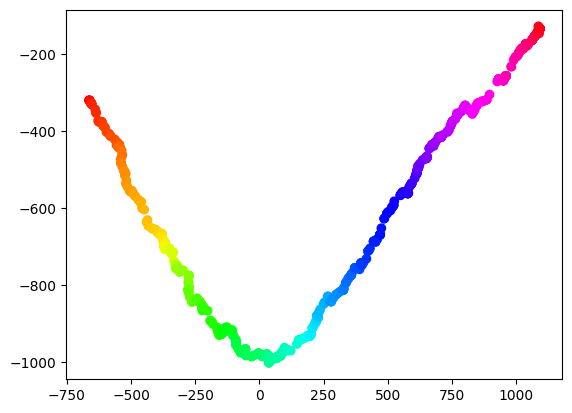

In [5]:
fig, axs = plt.subplots()
axs.scatter(test_embedding_2d[:, 0], test_embedding_2d[:, 1], cmap="hsv", c=phases)
plt.show()


In [6]:
import importlib
importlib.reload(generate_1d)
with torch.no_grad():
    _, pred_phases, _ = generate_1d.encode_decode_cost(encoder_2d, decoder_2d, phases_torch)
pred_phases = pred_phases.cpu().numpy()

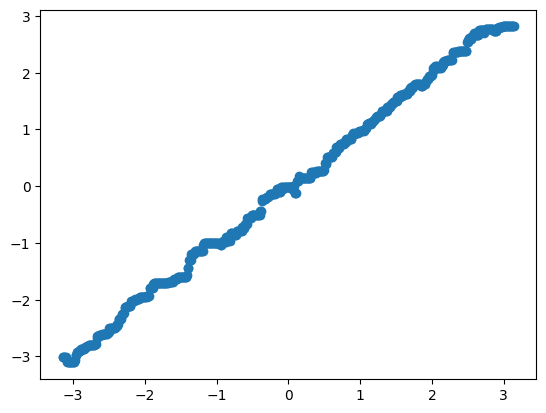

In [7]:
%matplotlib inline
fig, axs = plt.subplots()
axs.scatter(phases, pred_phases)

In [8]:
encoder_3d, decoder_3d, _ = generate_1d.train(0, 1, 3, device, n_training_iterations=5000)


iteration: 0, decoding loss: 2.35183048248291, distance cost: 0.011699464172124863
iteration: 6, decoding loss: 0.518445611000061, distance cost: 0.22499282658100128
iteration: 148, decoding loss: 0.6567778587341309, distance cost: 0.08202500641345978
iteration: 160, decoding loss: 0.643077552318573, distance cost: 0.0784793570637703
iteration: 161, decoding loss: 0.6437425017356873, distance cost: 0.07297470420598984
iteration: 162, decoding loss: 0.592584490776062, distance cost: 0.06576480716466904
iteration: 165, decoding loss: 0.5710580945014954, distance cost: 0.07345328480005264
iteration: 166, decoding loss: 0.5533581972122192, distance cost: 0.06795051693916321
iteration: 227, decoding loss: 0.5400450825691223, distance cost: 0.0745299831032753
iteration: 228, decoding loss: 0.5348102450370789, distance cost: 0.0732940286397934
iteration: 230, decoding loss: 0.5335665941238403, distance cost: 0.07260330766439438
iteration: 231, decoding loss: 0.5281844735145569, distance cost:

In [9]:
with torch.no_grad():
    test_embedding_3d = encoder_3d(phases_torch)
test_embedding_3d = test_embedding_3d.cpu().numpy()

In [10]:
%matplotlib tk
proj_fig = plt.figure()
proj_axs = proj_fig.add_subplot(projection="3d")
proj_axs.scatter(test_embedding_3d[:, 0], test_embedding_3d[:, 1], test_embedding_3d[:, 2], cmap="hsv", c=phases)
plt.show()


In [12]:
encoder_high, decoder_high, _ = generate_1d.train(0, 1, 12, device, n_training_iterations=5000)


iteration: 0, decoding loss: 1.5026379823684692, distance cost: 0.04319822043180466
iteration: 1, decoding loss: 0.8400673270225525, distance cost: 0.010207310318946838
iteration: 4, decoding loss: 0.760263204574585, distance cost: 0.05827176570892334
iteration: 111, decoding loss: 0.7774231433868408, distance cost: 0.015370788984000683
iteration: 117, decoding loss: 0.7717031240463257, distance cost: 0.014128788374364376
iteration: 166, decoding loss: 0.7655648589134216, distance cost: 0.012829178012907505
iteration: 167, decoding loss: 0.7469984292984009, distance cost: 0.012377060949802399
iteration: 168, decoding loss: 0.7345384955406189, distance cost: 0.013775864616036415
iteration: 169, decoding loss: 0.7089818716049194, distance cost: 0.014876555651426315
iteration: 175, decoding loss: 0.681117594242096, distance cost: 0.016463028267025948
iteration: 179, decoding loss: 0.6685774326324463, distance cost: 0.02208329550921917
iteration: 183, decoding loss: 0.6608670949935913, dis

In [15]:
with torch.no_grad():
    test_embedding_high = encoder_high(phases_torch)
test_embedding_high = test_embedding_high.cpu().numpy()
test_embedding_high = test_embedding_high/np.mean(np.abs(test_embedding_high))

In [1]:
encoder, decoder, _ = decode_1d.train(test_embedding_high, 0, 1, device, integration_resamples=15)


NameError: name 'decode_1d' is not defined